# Assignment 3: Monte Carlo methods to estimate volume of a sphere

The aim of this practice is to use both \textbf{crude Monte Carlo} and \textbf{Importance Sampling} methods to obtain an estimation of the volume of a $D$-dimensional sphere.

In order to do that, we will follow these steps:
1. Generate $D$ random variables according to a uniform distribution, such that $(x_1,x_2,\ldots,x_D)\in[0,1]^D$
2. Check that the random sampled point is inside the sphere. That is, if $\sum_{i=1}^D x^2_i < 1^2$ then we count it as a hit.
3. Repeat steps 1. and 2. $N$ times and keep counting the number of hits.
4. Finally, approximate the volume of the $D$ dimensional sphere as
$$
    V \approx (2R)^D\frac{N_{hits}}{N_{tries}}
$$
The $(2R)^D$ factor comes from the fact that sampling $D$ uniform variables from $(0,1)$ we only account for the region of the sphere where all variables will be positive. So, in order to obtain an approximation of the volume of the whole sphere, we have to multiply by $2^D$, the other $R^D$ factor simply scales the axes for any sphere with radius $R$.
5. Then, we can compare this estimation with the exact volume of a $D$-dimensional sphere. In the case of a circle (2D sphere), the volume (or the area) is simply:
$$
    A = V_2 = \pi R^2
$$
while in the 3D case it is,
$$
    V_3 = \frac{4}{3}\pi R^3
$$
In general, we can follow a recurrence rule for the volume of a $D$-dimensional sphere that will allow its computation in approximately $D/2$ steps:
$$
    V_D(R) = 
    \begin{cases}
        1 & \text{if}\;n=0 \\
        2R & \text{if}\;n=1 \\
        \frac{2\pi}{D}R^2\times V_{D-2}(R) & \text{otherwise}
    \end{cases}
$$

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Some functions

In [2]:
def exactVolume(D:int,R=1):
    # This function calculates the exact volume of a D-dimensional sphere
    # according to the recurrence rule.
	if not isinstance(D,int):
		raise TypeError("D must be a positive integer, your D: ",D)
	if D < 0:
		raise ValueError("D must be a positive integer, your D: ",D)
	if D == 0:
		return 1
	elif D == 1:
		return 2*R
	else:
		return (2*np.pi*R**2/D)*exactVolume(D-2,R)

def estimateVolume(D:int,N:int,R=1):
	# Generate D uniform random variables N times
	points = np.random.rand(N,D)
	
	# Calculate statistical error of the points
	std = np.std(points)/np.sqrt(N)
	
	# Count the number of hits (axis=0 vertical, axis=1 horizontal)
	N_hits = np.sum(np.where(np.sum(points**2,axis=1) < 1,1,0))
	
	# return estimate of volume and statistical error of the points
	return (2*R)**D*N_hits/N, std
	
def importanceSamplingVolume(D:int,N:int,R=1):
    # Importance sampling Monte Carlo used to approximate the volume
    # when the dimension is too large
    
	# Calculate optimal standard deviation
	sigma = R/np.sqrt(D)	
	
	# Generate D normal random variables N times
	points = sigma*np.random.randn(N,D)
	
	# Count the number of hits (axis=0 vertical, axis=1 horizontal)
	N_hits = np.where(np.sum(points**2,axis=1) < 1,1,0)
	
	# Calculate the exponential term from the normal distribution
	exp_term = np.exp(np.sum(points**2,axis=1)/(2*sigma**2))
	
	# sum of the contributions
	sum_term = N_hits @ exp_term

    # Calculate statistical error of the points
	std = np.std(points)/np.sqrt(N)
    
	# return estimate of volume and statistical error of the points
	return (2*np.pi)**(D/2)*sigma**D*sum_term/N, std

## First Part: Estimate area of a circle

Consider a circle of unit radius, $R=1$ in two dimensions. We can generate $N$ random numbers $0 < x < 1$ and $0 < y < 1$ using uniform random distribution. Count the number of times that a pair $(x,y)$ lies inside the circle. Namely, check that $x^2_i+y^2_i < 1^2$ for each $i = 1,\ldots,N$ of the iterations and use this probability to estimate the area of a circle.

Finally, compare it with the exact area of a circle and plot the relative error as well as the statistical error.

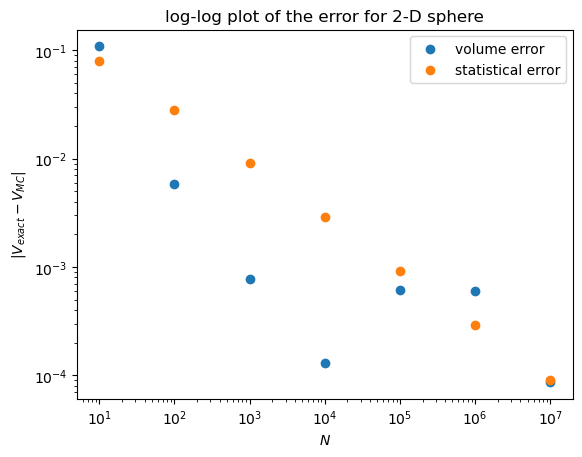

In [3]:
# Maximum order of iterations (10^7)
maxN = 7

# 2-Dimensions
D = 2

# List of N values
N_list = [10**(i+1) for i in range(maxN)]

estimates = []
stat_errors = []
for N in N_list:
	estimate, std = estimateVolume(D,N)
	estimates.append(estimate)
	stat_errors.append(std)
	
# Exact volume
exact = exactVolume(D)

# Plot error
plt.scatter(N_list,np.abs(exact-np.array(estimates))/exact,marker='o',label='volume error')
plt.scatter(N_list,stat_errors,marker='o',label='statistical error')
plt.legend()
plt.loglog()
plt.title(f"log-log plot of the error for {D}-D sphere")
plt.xlabel(r"$N$")
plt.ylabel(r"$|V_{exact}-V_{MC}|$")
plt.show()

## Second Part: Volume of a sphere in 3D

Consider a sphere of unit radius, $R=1$ in 3 dimensions. Repeat the same procedure as in 2D, but now generate an additional random variable $0 < z < 1$ so that you can check that whether the triplet $(x,y,z)$ is inside the sphere. In other words, for each iteration $i$, count how many times the condition $x^2_i+y^2_i+z^2_i < 1^2$ is fulfilled.

Compare it with the exact result of the volume, and report the statistical error.

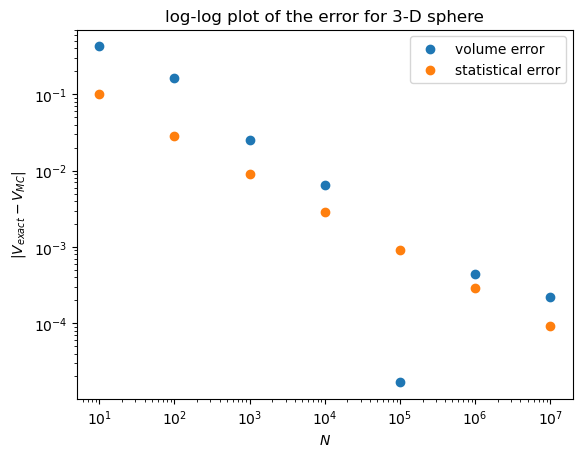

In [4]:
# 3-Dimensions
D = 3

# List of N values
N_list = [10**(i+1) for i in range(maxN)]

estimates = []
stat_errors = []
for N in N_list:
	estimate, std = estimateVolume(D,N)
	estimates.append(estimate)
	stat_errors.append(std)

# Exact volume
exact = exactVolume(D)

# Plot error
plt.scatter(N_list,np.abs(exact-np.array(estimates))/exact,marker='o',label='volume error')
plt.scatter(N_list,stat_errors,marker='o',label='statistical error')
plt.legend()
plt.loglog()
plt.title(f"log-log plot of the error for {D}-D sphere")
plt.xlabel(r"$N$")
plt.ylabel(r"$|V_{exact}-V_{MC}|$")
plt.show()

## Third Part: Volume of a sphere in D dimensions

Now let us generalize to the $D$-dimensional case. Generate $D$ random numbers $0 < x_i < 1, i = 1,\ldots,D$ for $N$ times. Calculate the probability
that point $(x_1,\ldots,x_D)$ lies inside of the sphere, i.e., $\sum_{i=1}^Dx^2_i < 1^2$. Use this result to approximate the volume of the sphere and compare it with the exact result, also report the statistical error.

What is the largest space dimensionality, in which this method can be reliably used? What is the ratio between the volume of the sphere of diameter $2R$ and a cube with side $2R$ in $D$ dimensions?

First, let us try to estimate the volume of a 10-dimensional sphere.

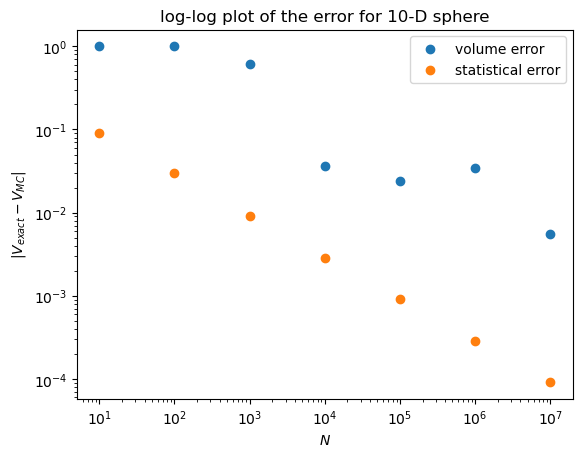

In [5]:
# 10-Dimensions
D = 10

# List of N values
N_list = [10**(i+1) for i in range(maxN)]

estimates = []
stat_errors = []
for N in N_list:
	estimate, std = estimateVolume(D,N)
	estimates.append(estimate)
	stat_errors.append(std)

# Exact volume
exact = exactVolume(D)

# Plot error
plt.scatter(N_list,np.abs(exact-np.array(estimates))/exact,marker='o',label='volume error')
plt.scatter(N_list,stat_errors,marker='o',label='statistical error')
plt.legend()
plt.loglog()
plt.title(f"log-log plot of the error for {D}-D sphere")
plt.xlabel(r"$N$")
plt.ylabel(r"$|V_{exact}-V_{MC}|$")
plt.show()

We start to observe a discrepancy between the statistical error and the error of our approximation. However, since the "crude" method can still  somewhat approximate the volume, let us try increasing the dimensionality up to D = 25.

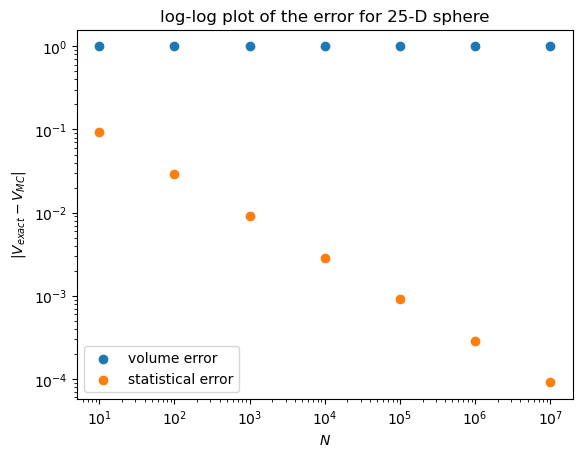

In [6]:
# 25-Dimensions
D = 25

# List of N values
N_list = [10**(i+1) for i in range(maxN)]

estimates = []
stat_errors = []
for N in N_list:
	estimate, std = estimateVolume(D,N)
	estimates.append(estimate)
	stat_errors.append(std)

# Exact volume
exact = exactVolume(D)

# Plot error
plt.scatter(N_list,np.abs(exact-np.array(estimates))/exact,marker='o',label='volume error')
plt.scatter(N_list,stat_errors,marker='o',label='statistical error')
plt.legend()
plt.loglog()
plt.title(f"log-log plot of the error for {D}-D sphere")
plt.xlabel(r"$N$")
plt.ylabel(r"$|V_{exact}-V_{MC}|$")
plt.show()

Here we can already see that our method is not working anymore, and in fact we can check that the estimated volumes are all 0.

In [7]:
print(f"Volume estimations: {estimates}")

Volume estimations: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


To see what is happening, let us plot the ratio between a hypersphere and a hypercube for increasing values of $D$:

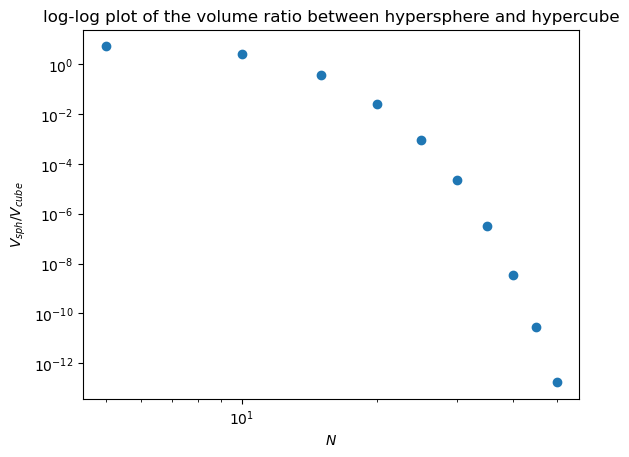

In [8]:
# Plot ratio between volume of the sphere and cube
# The ratio is equivalent to calculating the volume of a unit sphere
volumes = []
D_list = [5*i+5 for i in range(10)]
for i in D_list:
	volumes.append(exactVolume(i))
plt.scatter(D_list,volumes,marker='o')
plt.loglog()
plt.title(f"log-log plot of the volume ratio between hypersphere and hypercube")
plt.xlabel(r"$N$")
plt.ylabel(r"$V_{sph}/V_{cube}$")
plt.show()

As we can see, the ratio becomes almost machine precision for dimensionality larger than 50. But the average number of tries we need to get a point inside a hypersphere becomes too small already for N > 15-20. This means that if we try to approximate the volume of a sphere in 15 or 20 dimensions using our crude Monte Carlo method, it may happen that not a single point will be generated inside the sphere, and thus our approximation of the volume will go to 0 (as we had seen for $D = 25$).

## Fourth Part: Volume inside a sphere in D = 100 dimensions

The crude Monte Carlo method does not work well if the sphere volume is significantly smaller than the volume of the cube in which we generate the random variables. A possible way out is to sample more frequently the region close to the origin by using an \textbf{importance sampling} technique:
1. We generate the random numbers according to a normal distribution
2. We adjust the mean value to 0 (around the origin), and let the variance be a free parameter $\sigma_p$:
$$
    p(x) = \frac{1}{\sqrt{2\pi}\sigma_p}e^{-\frac{x^2}{2\sigma^2_p}}
$$
3. This degree of freedom can be used to minimize the variance and the resulting statistical error. But most importantly we can adjust it in order to sample more points inside of the sphere in high dimensionality spaces.

One can estimate the optimal value of this free parameter by considering the important region of interest as the edge of the sphere, $\sum_{i=1}^Dx^2_i = R^2$, which after averaging equals to $\langle \sum_{i=1}^Dx^2_i\rangle = D\sigma^2_p = R^2$. This provides an estimation of the optimal value of the free parameter as $\sigma_p = R/\sqrt{D}$.

Now let us see if we can estimate the volume of a 100-dimensional sphere with acceptable error.

Exact:  2.3682021018828297e-40
Estimate:  [5.841908492394703e-40, 2.851191546236146e-40, 2.3271444062335752e-40, 2.264380937240395e-40, 2.3668218943657503e-40]


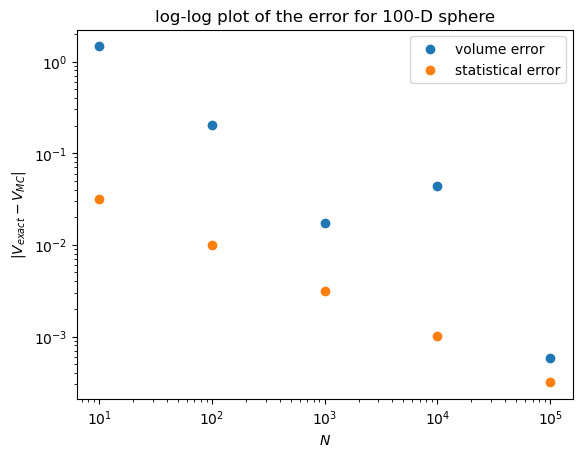

In [9]:
# 100-Dimensions
D = 100

# List of N values
N_list = [10**(i+1) for i in range(5)]

estimates = []
stat_errors = []
for N in N_list:
	estimate, std = importanceSamplingVolume(D,N)
	estimates.append(estimate)
	stat_errors.append(std)

# Exact volume
exact = exactVolume(D)

print("Exact: ",exact)
print("Estimate: ",estimates)

# Plot error
plt.scatter(N_list,np.abs(exact-np.array(estimates))/exact,marker='o',label='volume error')
plt.scatter(N_list,stat_errors,marker='o',label='statistical error')
plt.legend()
plt.loglog()
plt.title(f"log-log plot of the error for {D}-D sphere")
plt.xlabel(r"$N$")
plt.ylabel(r"$|V_{exact}-V_{MC}|$")
plt.show()